## 1.
Download the dataset here: https://www.kaggle.com/sohier/calcofi and create one DataFrame for the bottle file and another for the cast file. Perform preprocessing on this dataset. You do not need to do all six types of preprocessing we discussed. For this dataset, 2-3 is all you need.

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import statistics as stats
from scipy import stats

#loading cast dataset
file_to_load = "cast.csv"

# Read Purchasing File and store into Pandas data frame
cast_df = pd.read_csv(file_to_load)

/Users/olesiamukha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (40,41,44,45,46,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [78]:
cast_df.head()

,Cst_Cnt,Cruise_ID,Cruise,Cruz_Sta,DbSta_ID,Cast_ID,Sta_ID,Quarter,Sta_Code,Distance,...,Wave_Prd,Wind_Dir,Wind_Spd,Barometer,Dry_T,Wet_T,Wea,Cloud_Typ,Cloud_Amt,Visibility
0,1,1949-03-01-C-31CR,194903,19490305400560,5400560,19-4903CR-HY-060-0930-05400560,054.0 056.0,1,NST,NaN,...,NaN,23.0,18.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
1,2,1949-03-01-C-31CR,194903,19490305200750,5200750,19-4903CR-HY-060-2112-05200750,052.0 075.0,1,NST,NaN,...,NaN,16.0,5.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN
2,3,1949-03-01-C-31CR,194903,19490305100850,5100850,19-4903CR-HY-061-0354-05100850,051.0 085.0,1,NST,NaN,...,NaN,23.0,5.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN
3,4,1949-03-01-C-31CR,194903,19490305000950,5000950,19-4903CR-HY-061-1042-05000950,050.0 095.0,1,NST,NaN,...,NaN,18.0,8.0,NaN,NaN,NaN,2.0,NaN,NaN,NaN
4,5,1949-03-01-C-31CR,194903,19490305001040,5001040,19-4903CR-HY-061-1706-05001040,050.0 104.0,1,NST,NaN,...,NaN,27.0,13.0,NaN,NaN,NaN,7.0,NaN,NaN,NaN


In [79]:
#loading bottle dataset
file_to_load2 = "bottle.csv"

# Read Purchasing File and store into Pandas data frame
bottle_df = pd.read_csv(file_to_load2)

/Users/olesiamukha/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [80]:
bottle_df.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [114]:
bottle_df.dtypes

Cst_Cnt                  int64
Btl_Cnt                  int64
Sta_ID                  object
Depth_ID                object
Depthm                   int64
                        ...   
TA1                    float64
TA2                    float64
pH2                    float64
pH1                    float64
DIC Quality Comment     object
Length: 74, dtype: object

In [108]:
bottle_df.var()#checking the dataset variance.
#the variance of the columns is pretty similar so no need to normalize it.

Cst_Cnt    1.048771e+08
Btl_Cnt    6.233241e+10
Depthm     9.988777e+04
T_degC     1.801005e+01
Salnty     2.132993e-01
               ...     
DIC2       2.397924e+04
TA1        1.214135e+03
TA2        3.421840e+03
pH2        4.501179e-04
pH1        6.032021e-03
Length: 70, dtype: float64

In [ ]:
#scaling data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(bottle_df), columns = bottle_df.columns)

In [81]:
#checking to see which columns the dataset has
print(bottle_df.columns)

Index(['Cst_Cnt', 'Btl_Cnt', 'Sta_ID', 'Depth_ID', 'Depthm', 'T_degC',
       'Salnty', 'O2ml_L', 'STheta', 'O2Sat', 'Oxy_µmol/Kg', 'BtlNum',
       'RecInd', 'T_prec', 'T_qual', 'S_prec', 'S_qual', 'P_qual', 'O_qual',
       'SThtaq', 'O2Satq', 'ChlorA', 'Chlqua', 'Phaeop', 'Phaqua', 'PO4uM',
       'PO4q', 'SiO3uM', 'SiO3qu', 'NO2uM', 'NO2q', 'NO3uM', 'NO3q', 'NH3uM',
       'NH3q', 'C14As1', 'C14A1p', 'C14A1q', 'C14As2', 'C14A2p', 'C14A2q',
       'DarkAs', 'DarkAp', 'DarkAq', 'MeanAs', 'MeanAp', 'MeanAq', 'IncTim',
       'LightP', 'R_Depth', 'R_TEMP', 'R_POTEMP', 'R_SALINITY', 'R_SIGMA',
       'R_SVA', 'R_DYNHT', 'R_O2', 'R_O2Sat', 'R_SIO3', 'R_PO4', 'R_NO3',
       'R_NO2', 'R_NH4', 'R_CHLA', 'R_PHAEO', 'R_PRES', 'R_SAMP', 'DIC1',
       'DIC2', 'TA1', 'TA2', 'pH2', 'pH1', 'DIC Quality Comment'],
      dtype='object')


In [82]:
#figuring our how many NaNs our 2 columns we'll work with Salinity and Water Temperature contain.
print(bottle_df["Salnty"].isnull().sum())
print(bottle_df["T_degC"].isnull().sum())

47354
10963


In [83]:
#checking the column types
bottle_df["Salnty"].dtypes
bottle_df["T_degC"].dtypes

dtype('float64')

In [132]:
#cleaning the 2 columns we'll be using in our analysis from all the NaN values and storing them in a new dataframe
df1 = bottle_df[["Salnty", "T_degC"]].dropna()
df1

,Salnty,T_degC
count,814247.000000,814247.000000
mean,33.841337,10.860287
std,0.461636,4.224930
min,28.431000,1.440000
25%,33.489000,7.750000
50%,33.866000,10.110000
75%,34.197000,13.930000
max,37.034000,31.140000


## 2.
Create a correlation matrix to see how the features are correlated. Describe your findings. Pay particular attention to what is correlated with water temperature.

In [85]:
import seaborn as sns
corrMatrix = bottle_df.corr()

In [86]:
corrMatrix

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
Cst_Cnt,1.000000,0.999345,-0.162222,0.089329,-0.198024,0.156096,-0.089902,0.136510,0.147493,-0.026749,...,0.005807,-0.040576,-0.161961,-0.604945,-0.036155,-0.097938,-0.075060,-0.115212,-0.262587,0.020778
Btl_Cnt,0.999345,1.000000,-0.161617,0.090118,-0.195207,0.154219,-0.089521,0.134732,0.145498,-0.027514,...,0.009648,-0.035778,-0.161348,-0.595142,-0.035516,-0.097251,-0.074255,-0.114165,-0.259082,0.020315
Depthm,-0.162222,-0.161617,1.000000,-0.681201,0.572630,-0.592399,0.582710,-0.595547,-0.589175,-0.681935,...,-0.279636,-0.201450,0.999994,-0.018605,0.567855,0.572374,0.786873,0.866185,0.223304,-0.611798
T_degC,0.089329,0.090118,-0.681201,1.000000,-0.505266,0.795700,-0.829155,0.850596,0.795543,0.750413,...,0.108925,0.014987,-0.679852,0.006503,-0.936239,-0.949972,-0.742196,-0.889635,0.547436,0.743735
Salnty,-0.198024,-0.195207,0.572630,-0.505266,1.000000,-0.823870,0.603470,-0.790231,-0.824338,-0.693341,...,-0.029373,-0.003063,0.571405,-0.000758,0.938153,0.955942,0.895124,0.937147,0.583807,0.106417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DIC2,-0.097938,-0.097251,0.572374,-0.949972,0.955942,-0.941214,0.965546,-0.962977,-0.941528,-0.958549,...,0.024819,0.220101,0.570633,-0.026912,0.991091,1.000000,0.885735,0.888669,NaN,NaN
TA1,-0.075060,-0.074255,0.786873,-0.742196,0.895124,-0.802493,0.779899,-0.788291,-0.802435,-0.737828,...,0.006186,-0.010690,0.785334,0.025613,0.853682,0.885735,1.000000,0.994924,0.616844,0.260047
TA2,-0.115212,-0.114165,0.866185,-0.889635,0.937147,-0.726460,0.887778,-0.767766,-0.727023,-0.828905,...,0.265152,0.235116,0.865140,0.020177,0.883278,0.888669,0.994924,1.000000,0.578090,0.577613
pH2,-0.262587,-0.259082,0.223304,0.547436,0.583807,0.174204,-0.480397,0.732628,0.180058,-0.457365,...,0.047099,0.049127,0.223304,-0.457365,NaN,NaN,0.616844,0.578090,1.000000,0.995913


## 3.
Perform linear regression on the dataset to see if you can predict water temperature based on salinity.

In [87]:
from sklearn.model_selection import train_test_split

In [88]:
X = np.array(df1['Salnty']).reshape(-1,1)
y=np.array(df1['T_degC']).reshape(-1,1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=45)

In [89]:
from sklearn.linear_model import LinearRegression

regression_df = LinearRegression()
regression_df.fit(X_train, y_train)

LinearRegression()

In [90]:
y_pred = regression_df.predict(X_test)

In [91]:
accuracy_score = regression_df.score(X_test, y_test)
accuracy_score

0.2554282557626898

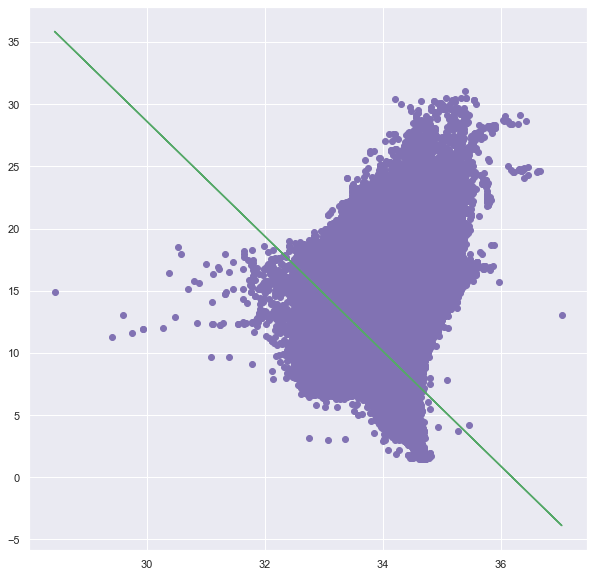

In [92]:
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color='g')
plt.show()

## 4. 
Find your mean squared error and R2 values. Be sure to indicate what these tell you. You can import these from sklearn.metrics!

In [93]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.2554282557626898

In [94]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

13.292437299940586

## 5.
Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the predicted temperature values.

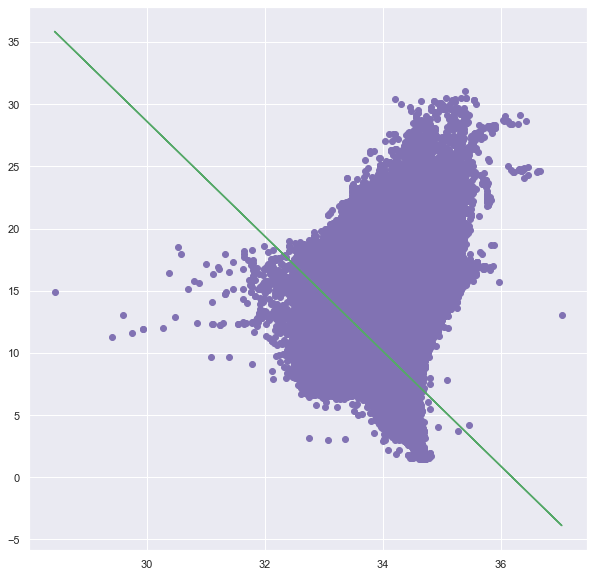

In [95]:
plt.scatter(X_test, y_test, color = 'm')
plt.plot(X_test, y_pred, color='g')
plt.show()

## 6.
Do some research on polynomial regression. Describe what it is any how it works in markdown. This article is useful https://machinelearningmastery.com/polynomial-features-transforms-for-machine-learning/ !

Polynomial regressions is used to expose different data interactions that can improve the performance of a model. We're basically raising the variable to the power. Transforms like raising input variables to a power can help to better expose the important relationships between input variables and the target variable. Basically, we use polynomial transforms to create new versions of input variables for predictive modeling.

Polynomial regression tends to provide the best approximation of the relationship between dependent and independent variable

## 7.

Perform polynomial regression on this same dataset. Train and validate your model as you did when you used linear regression. Mean squared error and R2 both apply here.

In [96]:
X = np.array(df1['Salnty']).reshape(-1,1)
y=np.array(df1['T_degC']).reshape(-1,1)

In [97]:
lin = LinearRegression()
lin.fit(X, y)

LinearRegression()

In [125]:
# Fitting Polynomial Regression to the dataset
from sklearn.preprocessing import PolynomialFeatures
  
poly = PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
  
poly.fit(X_poly, y)
lin2 = LinearRegression()
lin2.fit(X_poly, y)
y_poly_pred = lin2.predict(X_poly)
y_poly_pred

array([[12.6100292 ],
       [12.6100292 ],
       [12.62788751],
       ...,
       [12.75978514],
       [12.81300581],
       [12.92391275]])

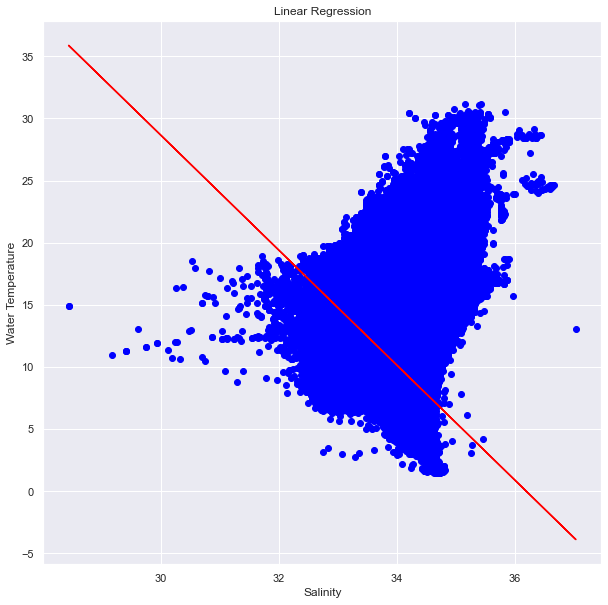

In [106]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin.predict(X), color = 'red')
plt.title('Linear Regression')
plt.xlabel('Salinity')
plt.ylabel('Water Temperature')
  
plt.show()

In [128]:
from sklearn import metrics
#calculating mean suqred error
mean_quared_error = metrics.mean_squared_error(y, y_poly_pred)
mean_quared_error

13.022386758725505

In [131]:
#calculating. r2 score
r2_score = metrics.r2_score(y,  y_poly_pred)
r2_score

0.27045499715936394

## 8.
Create a final plot of the relationship between water temperature and salinity. Be sure to show the values from the dataset in a scatter plot with a trend line that shows the polynomial regression predicted temperature values. The resulting trend line should be curved.

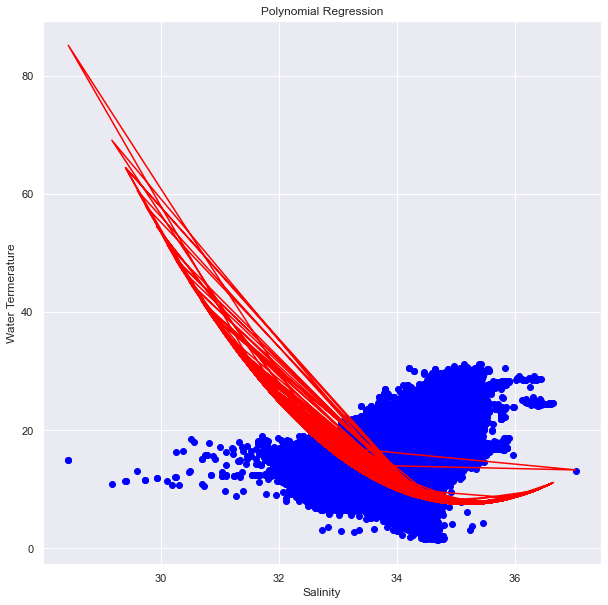

In [107]:
# Visualising the Polynomial Regression results
plt.scatter(X, y, color = 'blue')
  
plt.plot(X, lin2.predict(poly.fit_transform(X)), color = 'red')
plt.title('Polynomial Regression')
plt.xlabel('Salinity')
plt.ylabel('Water Termerature')
  
plt.show()